In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp

logins = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

In [2]:
logins.sort_values('user_id')

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
14,2014-03-31 03:45:04,2,1
13,2014-03-13 03:45:04,2,1
12,2014-03-09 03:45:04,2,1
11,2014-02-16 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [3]:
logins.set_index(pd.DatetimeIndex(logins['time_stamp']), inplace=True)

In [4]:
logins.drop(columns=('time_stamp'),inplace=True)

In [5]:
engaged_dict= {}

for i in range(len(logins.user_id.unique())):
    sample = logins[logins.user_id == i].rolling('7D').sum()
    answer = sample[sample['visited'] >=3]['visited'].any()
    if answer == True:
        engaged_dict[i] = 1
    else:
        engaged_dict[i] = 0

In [6]:
users['engaged'] = users['object_id'].map(engaged_dict)
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,NaN


In [7]:
users.groupby('engaged').mean()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
engaged,,,,,,
0.0,4410.209378,1.375573e+09,0.252743,0.151776,138.847309,5960.772093
1.0,4419.974271,1.395533e+09,0.262436,0.156947,163.169811,5809.451128


There is a slightly higher incidence of engaged users opting into the mailing list but that may prove negigable after testing.

Working under the null assumption, that there is no difference in mailing list opt_ins between the two groups, lets run an experiment.

In [8]:
users[users['engaged']==1]['opted_in_to_mailing_list']

1       0
9       1
19      0
32      0
41      1
       ..
8788    0
8802    0
8805    0
8808    0
8810    0
Name: opted_in_to_mailing_list, Length: 1166, dtype: int64

In [9]:
mean = []
for i in range(10000):
    test = np.random.choice(users.opted_in_to_mailing_list,replace=True, size=10000)
    mean.append(test.mean())

In [10]:
print("The odds of any user at random being subscribed to the mailing list is " + str(round(np.mean(mean),5)) + "%")
print("The standard deciation of the random sample means is " + (str(round(np.std(mean),5))))

sp.stats.ttest_ind(users[users['engaged']==1]['opted_in_to_mailing_list'],mean)

The odds of any user at random being subscribed to the mailing list is 0.24932%
The standard deciation of the random sample means is 0.00428


Ttest_indResult(statistic=2.9792452375357854, pvalue=0.002895811516885767)

The null hypothesis that engagement has no effect on mailing list opt in can be rejected based on the above p value. 

In [90]:
mean = []
for i in range(10000):
    test = np.random.choice(users.enabled_for_marketing_drip,replace=True, size=10000)
    mean.append(test.mean())

In [91]:
print("The odds of any user at random being enabled for marketing drip " + str(round(np.mean(mean),5)) + "%")
print("The standard deciation of the random sample means is " + (str(round(np.std(mean),5))))

sp.stats.ttest_ind(users[users['engaged']==1]['enabled_for_marketing_drip'],mean)

The odds of any user at random being enabled for marketing drip 0.14934%
The standard deciation of the random sample means is 0.00358


Ttest_indResult(statistic=2.0897162815095385, pvalue=0.0366658690173118)

In [11]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
engaged                       3178
dtype: int64

In [12]:
users['last_session_creation_time'].fillna(0, inplace=True)
users['invited_by_user_id'].fillna(0, inplace=True)
users['engaged'].fillna(0, inplace=True)

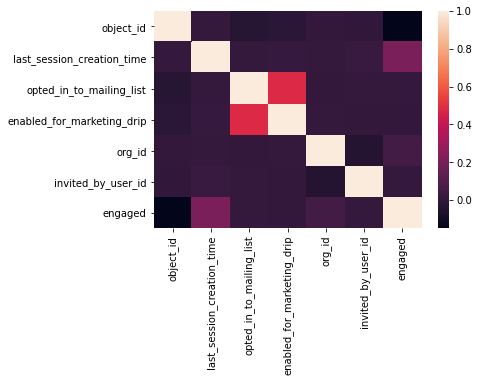

In [13]:
sns.heatmap(users.corr())
plt.show()

In [14]:
source = pd.DataFrame(users.groupby(['creation_source','engaged']).count()['object_id'])
source

object_id
creation_source    engaged           
GUEST_INVITE       0.0           1905
                   1.0            258
ORG_INVITE         0.0           3847
                   1.0            407
PERSONAL_PROJECTS  0.0           1990
                   1.0            121
SIGNUP             0.0           1879
                   1.0            208
SIGNUP_GOOGLE_AUTH 0.0           1213
                   1.0            172

In [15]:
for value in users.creation_source.unique():
    pct_engaged = source.loc[value]['object_id'][1]/(source.loc[value]['object_id'][0]+source.loc[value]['object_id'][1])
    print("Pct of " + value + " users who are active: " + str(round((pct_engaged*100),2)))

Pct of GUEST_INVITE users who are active: 11.93
Pct of ORG_INVITE users who are active: 9.57
Pct of SIGNUP users who are active: 9.97
Pct of PERSONAL_PROJECTS users who are active: 5.73
Pct of SIGNUP_GOOGLE_AUTH users who are active: 12.42


Guest Invites and Google Authorized Signups are the most likely to be engaged users. 

In [16]:
for i in range(len(users)):
    users['last_session_creation_time'][i] = \
    dt.datetime.fromtimestamp(users['last_session_creation_time'][i]).strftime('%D, %H:%M:%S')

/Users/rachelruzzo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rachelruzzo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
users['last_session_creation_time'].sort_values()

1352    01/01/13, 01:24:35
2615    01/01/13, 04:50:26
8709    01/01/13, 05:46:27
4790    01/01/13, 10:39:09
3230    01/01/13, 12:00:32
               ...        
8660    12/31/69, 18:00:00
8661    12/31/69, 18:00:00
8664    12/31/69, 18:00:00
8508    12/31/69, 18:00:00
5999    12/31/69, 18:00:00
Name: last_session_creation_time, Length: 12000, dtype: object

In [18]:
# It looks like this the 12/31/69 date are users who created an account but never used the account.

users[users['last_session_creation_time']=='12/31/69, 18:00:00']

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,"12/31/69, 18:00:00",1,1,74,0.0,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,"12/31/69, 18:00:00",0,0,302,0.0,0.0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,"12/31/69, 18:00:00",0,0,130,9270.0,0.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,"12/31/69, 18:00:00",0,0,175,0.0,0.0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,"12/31/69, 18:00:00",0,0,211,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,"12/31/69, 18:00:00",0,0,248,0.0,0.0
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,"12/31/69, 18:00:00",1,0,29,0.0,0.0
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,"12/31/69, 18:00:00",0,0,74,0.0,0.0
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,"12/31/69, 18:00:00",0,0,281,0.0,0.0


In [19]:
neverUsed = users[users['last_session_creation_time']=='12/31/69, 18:00:00']['object_id'].count()/users['object_id'].count()

print(str(round((neverUsed*100),2)) + "% of users who have an account have never started a session.")

26.48% of users who have an account have never started a session.


In [20]:
users[users['last_session_creation_time']=='12/31/69, 18:00:00']['creation_source'].value_counts()

PERSONAL_PROJECTS    1347
ORG_INVITE           1066
GUEST_INVITE          575
SIGNUP                189
Name: creation_source, dtype: int64

In [21]:
users[users['last_session_creation_time']=='12/31/69, 18:00:00']['creation_source'].value_counts()[0]/source.loc['PERSONAL_PROJECTS']['object_id'][0]


0.6768844221105528

In [22]:
print(users[users['last_session_creation_time']=='12/31/69, 18:00:00']['creation_source'].value_counts()[1]/source.loc['ORG_INVITE']['object_id'][0])
print(users[users['last_session_creation_time']=='12/31/69, 18:00:00']['creation_source'].value_counts()[2]/source.loc['GUEST_INVITE']['object_id'][0])
print(users[users['last_session_creation_time']=='12/31/69, 18:00:00']['creation_source'].value_counts()[3]/source.loc['SIGNUP']['object_id'][0])


0.27709903821159343
0.30183727034120733
0.10058541777541245


About 2/3s of Personal projects users never use the service, opposed to 28% of Org Invites, 30% of guest invites, and 10% of signups.

In [23]:
users[users['last_session_creation_time']!='12/31/69, 18:00:00']['engaged'].value_counts()

0.0    7657
1.0    1166
Name: engaged, dtype: int64

In [24]:
users[users['last_session_creation_time']!='12/31/69, 18:00:00']['last_session_creation_time'].sort_values()

1352    01/01/13, 01:24:35
2615    01/01/13, 04:50:26
8709    01/01/13, 05:46:27
4790    01/01/13, 10:39:09
3230    01/01/13, 12:00:32
               ...        
3058    12/31/13, 01:33:08
9641    12/31/13, 10:45:11
8429    12/31/13, 14:27:09
9261    12/31/13, 18:21:51
907     12/31/13, 22:18:03
Name: last_session_creation_time, Length: 8823, dtype: object

In [25]:
users[users['last_session_creation_time']!='12/31/69, 18:00:00']['creation_time'].sort_values()

3860     2012-05-31 00:43:27
11429    2012-05-31 01:42:31
7169     2012-05-31 06:23:51
10011    2012-05-31 08:20:06
11998    2012-05-31 11:55:59
                ...         
6944     2014-05-30 23:10:35
9687     2014-05-30 23:12:01
10163    2014-05-30 23:27:30
3489     2014-05-30 23:45:01
6052     2014-05-30 23:59:19
Name: creation_time, Length: 8823, dtype: object

In [26]:
users['creation_time'].sort_values()

3860     2012-05-31 00:43:27
11429    2012-05-31 01:42:31
7169     2012-05-31 06:23:51
10011    2012-05-31 08:20:06
11998    2012-05-31 11:55:59
                ...         
6944     2014-05-30 23:10:35
9687     2014-05-30 23:12:01
10163    2014-05-30 23:27:30
3489     2014-05-30 23:45:01
6052     2014-05-30 23:59:19
Name: creation_time, Length: 12000, dtype: object

This is very strange. All of the "last session created" are in 2013, btu the creation times range from 2012-2014.

In [27]:
orgs = dict(zip(sorted(users['org_id'].unique()),users['org_id'].value_counts()))

In [28]:
engaged_orgs = pd.DataFrame(users[users['engaged'] == 1.0]['org_id'].value_counts()).reset_index()
engaged_orgs.columns = ['org_num', 'users']
engaged_orgs['pct_engaged'] = 0

In [29]:
for i in range(len(engaged_orgs)):
    engaged_orgs['pct_engaged'][i] = engaged_orgs['users'][i]/orgs[engaged_orgs['org_num'][i]] * 100

In [30]:
print(engaged_orgs[engaged_orgs['pct_engaged'] >=25].sort_values('pct_engaged', ascending=False).count())
engaged_orgs[engaged_orgs['pct_engaged'] >=25].sort_values('pct_engaged', ascending=False)

org_num        24
users          24
pct_engaged    24
dtype: int64


,org_num,users,pct_engaged
69,415,5,71
72,370,5,35
139,411,3,33
106,399,4,33
17,218,7,33
71,343,5,31
138,404,3,30
104,381,4,30
108,387,4,30
59,316,5,29


There are 28 organizations with user engagement over 25%

In [32]:
referral = dict(zip(users['object_id'], users['engaged']))
users['referer_engaged'] = 0

In [33]:
for i in range(len(users)):    
    if users['invited_by_user_id'][i] > 0:
        users['referer_engaged'][i] = referral[users['invited_by_user_id'][i].astype(int)]

/Users/rachelruzzo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
print(str(round((users[users['engaged'] == True]['referer_engaged'].sum()/users[users['engaged'] == True].count()[0] * 100),2))\
     + "% of engaged users were referred by another engaged user")
print(str(round((users[users['engaged'] == True]['referer_engaged'].sum()/users.count()[0] * 100),2))\
     + "% of engaged users referred by an engaged users among all users.")

12.69% of engaged users were referred by another engaged user
1.23% of engaged users referred by an engaged users among all users.


In [35]:
print(str(round((users[users['engaged'] == False]['referer_engaged'].sum()/users[users['invited_by_user_id'] == 0].count()[0] * 100),2))\
     + "% of unengaged users were not referred by anyone")

2.65% of engaged users were not referred by anyone
12.84% of unengaged users were not referred by anyone


In [62]:
print(str(round((users[users['engaged'] == False]['referer_engaged'].sum()/users[users['engaged'] == False].count()[0] * 100),2))\
     + "% of unengaged users were referred by an engaged user")

6.62% of unengaged users were referred by an engaged user


In [78]:
invited = users.copy()
invited['invited_by_user_id'] = invited['invited_by_user_id']>0

In [80]:
mean = []
for i in range(10000):
    test = np.random.choice(invited['invited_by_user_id'],replace=True, size=10000)
    mean.append(test.mean())

In [81]:
invited.groupby('engaged').mean()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,referer_engaged
engaged,,,,,,
0.0,6170.602732,0.248108,0.148514,139.593779,0.530921,0.066181
1.0,4419.974271,0.262436,0.156947,163.169811,0.570326,0.126930


In [84]:
print("The odds of any user at random being invited by another user is " + str(round(np.mean(mean),5)) + "%")
sp.stats.ttest_ind(invited[invited['engaged']==1]['invited_by_user_id'],mean)

The odds of any user at random being subscribed to the mailing list is 0.53475%
The standard deciation of the random sample means is 0.00501


Ttest_indResult(statistic=7.18260482417993, pvalue=7.274872400184485e-13)

In [86]:
mean = []
for i in range(10000):
    test = np.random.choice(invited['referer_engaged'],replace=True, size=10000)
    mean.append(test.mean())

In [88]:
print("The odds of any user at random being being invited by an engaged user " + str(round(np.mean(mean),5)) + "%")
print("The standard deciation of the random sample means is " + (str(round(np.std(mean),5))))

sp.stats.ttest_ind(invited[invited['engaged']==1]['referer_engaged'],mean)

The odds of any user at random being being invited by an engaged user 0.07206%
The standard deciation of the random sample means is 0.00257


Ttest_indResult(statistic=16.47553294543514, pvalue=2.823267685342462e-60)